# OR Tools Simple Example

In [1]:
!pip show ortools

Name: ortools
Version: 9.10.4067
Summary: Google OR-Tools python libraries and modules
Home-page: https://developers.google.com/optimization/
Author: Google LLC
Author-email: or-tools@google.com
License: Apache 2.0
Location: c:\users\vusal.babashov\myprograms\python3.9\lib\site-packages
Requires: absl-py, immutabledict, numpy, pandas, protobuf
Required-by: 


In [91]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver ('cbc')

x = solver.IntVar (0, 10, 'x')
y = solver.NumVar(0, 10, 'y')

solver.Add (-x+2*y<= 7)
solver.Add (2*x+y <= 14)
solver.Add (2*x-y <= 10)

solver.Maximize (x+y)
results = solver.Solve()

if results == pywraplp.Solver.OPTIMAL :
    print ("Optimal Found")
print("x:", x.solution_value())
print("y:", y.solution_value())

Optimal Found
x: 4.0
y: 5.5


# Pyomo Simple Example

In [7]:
!pip show pyomo

Name: Pyomo
Version: 6.7.1
Summary: Pyomo: Python Optimization Modeling Objects
Home-page: http://pyomo.org
Author: 
Author-email: 
License: BSD
Location: c:\users\vusal.babashov\myprograms\python3.9\lib\site-packages
Requires: ply
Required-by: 


In [105]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
model.x = pyo.Var (within = Integers, bounds = (0, 10))
model.y = pyo.Var(bounds = (0, 10))

x = model.x
y = model.y

model.c1 = pyo.Constraint (expr=  -x+2*x*y <= 8)
model.c2 = pyo.Constraint (expr=  2*x+y <= 14)
model.c3 = pyo.Constraint (expr=  2*x-y<= 10)

model.obj = pyo.Objective (expr =  x+y*x, sense =  maximize)

opt = SolverFactory('ipopt', executable="C:\\Users\\vusal.babashov\\MyPrograms\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt.exe")

result = opt.solve(model)

model.pprint()
x_value = pyo.value (x)
y_value = pyo.value (y)
print ("\n---------------------------------------------------------------")
print ('x=', x_value)
print ('y=', y_value)
# print (result)

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 5.6067151589768685 :    10 : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 1.2134302215032389 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x + y*x

3 Constraint Declarations
    c1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : - x + 2*x*y :   8.0 :   True
    c2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  14.0 :   True
    c3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x - y :  10.0 :   True

6 Declarations: x y c

# Pyomo Input Data From Excel

In [23]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pandas as pd

#inputs
dataGen = pd.read_excel("C:\\Users\\vusal.babashov\\OneDrive - Canadian Tire\\Desktop\\inputs.xlsx", sheet_name = 'gen')
dataLoad = pd.read_excel("C:\\Users\\vusal.babashov\OneDrive - Canadian Tire\\Desktop\\inputs.xlsx", sheet_name = 'load')
Ng = len(dataGen)


In [21]:
dataGen

,id,limit,cost
0,0,20,0.10
1,1,10,0.05
2,2,40,0.30
3,3,50,0.40
4,4,5,0.01


In [22]:
dataLoad

,id,value
0,0,50
1,1,20
2,2,30


In [32]:
model = pyo.ConcreteModel ()
model.Pg = pyo.Var (range (5), bounds = (0, None))
Pg = model.Pg

In [33]:
model.Pg.pprint()

Pg : Size=5, Index={0, 1, 2, 3, 4}
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :  None :  None : False :  True :  Reals
      1 :     0 :  None :  None : False :  True :  Reals
      2 :     0 :  None :  None : False :  True :  Reals
      3 :     0 :  None :  None : False :  True :  Reals
      4 :     0 :  None :  None : False :  True :  Reals


In [35]:
[dataLoad.value [d] for d in dataLoad.id]

[50, 20, 30]

In [36]:
[Pg[g] for g in dataGen.id]

In [39]:
print (sum ([Pg[g] for g in dataGen.id]))

Pg[0] + Pg[1] + Pg[2] + Pg[3] + Pg[4]


In [49]:
pg_sum = sum ([Pg[g] for g in dataGen.id])
model.balance = pyo.Constraint (expr = pg_sum == sum (dataLoad.value))
model.cond = pyo.Constraint (expr = Pg[0] + Pg [3] >= dataLoad.value[0])
model.limits = pyo.ConstraintList ()
for g in dataGen.id:
    model.limits.add(expr=Pg[g] <= dataGen.limit[g])
model.obj = pyo.Objective(expr = sum ([Pg[g]*dataGen.cost[g] for g in dataGen.id]))
opt = SolverFactory('glpk')
opt.solve(model)

'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown with a new
Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown with a new
Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.constraint.ConstraintList'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.constraint.ConstraintList'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicativ

{'Problem': [{'Name': 'unknown', 'Lower bound': 25.05, 'Upper bound': 25.05, 'Number of objectives': 1, 'Number of constraints': 7, 'Number of variables': 5, 'Number of nonzeros': 12, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.07904720306396484}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [50]:
dataGen['Pg'] = [pyo.value (Pg[g]) for g in dataGen.id]
print(dataGen)

   id  limit  cost    Pg
0   0     20  0.10  20.0
1   1     10  0.05  10.0
2   2     40  0.30  35.0
3   3     50  0.40  30.0
4   4      5  0.01   5.0


# Pyomo Another Example

In [110]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import time 
import numpy as np

model = pyo.ConcreteModel ()
model.x = pyo.Var (range (1, 6), within = Integers, bounds = (0, None))
model.y = pyo.Var (bounds = (0, None))

x = model.x
y = model.y


model.c1 = pyo.Constraint (expr = sum ([x[i] for i in range(1,6)]) + y <= 20)
model.c2 = pyo.ConstraintList ()

for i in range (1, 6):
    model.c2.add(expr = x[i] + y >= 15)
    
model.c3 = pyo.Constraint(expr = sum ([i*x[i] for i in range(1, 6)]) >= 10)
model.c4 = pyo.Constraint(expr = x[5] + 2*y >= 30)


model.obj = pyo.Objective(expr = sum ([x[i] for i in range(1, 6)]) + y, sense =  minimize)
begin = time.time()
# opt = SolverFactory('glpk')
opt = SolverFactory('cbc', executable="C:\\Users\\vusal.babashov\\MyPrograms\\solvers\\cbc.exe" )
result = opt.solve(model)
deltaT = time.time()-begin
print (result)
model.pprint()

print ('Run Time:', np.round (deltaT,2))
for i in range (1, 6):
    print ('x[%i] = %i' % (i, pyo.value (x[i])))
print('y = %.2f' % pyo.value (y))
print ('Obj = ', pyo.value(model.obj))


Problem: 
- Name: unknown
  Lower bound: 17.0
  Upper bound: 17.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 6
  Number of binary variables: 0
  Number of integer variables: 5
  Number of nonzeros: 6
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.0935969352722168
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

2 Var Declarations
    x : Size=5, Index={1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :  None : False : False : Integers
          2 :     0 :   0.0 :  None : False : False : Integ

# Pyomo NonLinear Example

In [116]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

model.x = pyo.Var (initialize = 0, bounds = (-5, 5))
model.y = pyo.Var (initialize = 0, bounds = (-5, 5))

x = model.x
y = model.y

model.obj = pyo.Objective(expr = cos(x+1) + cos(x)*cos(y), sense = maximize)

opt = SolverFactory ('ipopt', executable = "C:\\Users\\vusal.babashov\\MyPrograms\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt.exe")
opt.options ['tol'] = 1e-6
opt.solve(model)

model.pprint()

print ('x=', pyo.value(x))
print ('y=', pyo.value(y))

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value               : Upper : Fixed : Stale : Domain
        None :    -5 : -2.0707963262733804 :     5 : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value               : Upper : Fixed : Stale : Domain
        None :    -5 : -3.1415926514184487 :     5 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : cos(x + 1) + cos(x)*cos(y)

3 Declarations: x y obj
x= -2.0707963262733804
y= -3.1415926514184487


# Mixed Integer Non Linear Programming

In [120]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

model.x = pyo.Var (within = Integers, bounds = (0, 10))
model.y = pyo.Var(bounds = (0, 10))
x = model.x
y = model.y

model.c1 = pyo.Constraint (expr=  -x+2*y*x <= 8)
model.c2 = pyo.Constraint (expr=  2*x+y <= 14)
model.c3 = pyo.Constraint (expr=  2*x-y<= 10)

model.obj = pyo.Objective (expr =  x+y*x, sense =  maximize)

opt = SolverFactory('couenne', executable="C:\\Users\\vusal.babashov\\MyPrograms\\solvers\\couenne.exe")
# opt = SolverFactory('glpk')
opt.solve(model)
model.pprint()
x_value = pyo.value (x)
y_value = pyo.value (y)
print ("\n---------------------------------------------------------------")
print ('x=', x_value)
print ('y=', y_value)
# print (result)

ERROR: Solver (asl) returned non-zero return code (3221226356)
ERROR: Solver log: Couenne 0.5.6 -- an Open-Source solver for Mixed Integer
Nonlinear Optimization Mailing list: couenne@list.coin-or.org Instructions:
http://www.coin-or.org/Couenne couenne: ANALYSIS TEST: NLP0012I
                  Num      Status      Obj             It       time
                  Location
    NLP0014I             1         OPT -12.410073       10 0.105 Loaded
    instance
    "C:\Users\vusal.babashov\AppData\Local\Temp\2\tmpcx0ria9r.pyomo.nl"
    Constraints:            3 Variables:              4 (3 integer)
    Auxiliaries:            4 (0 integer)

    Coin0506I Presolve 6 (-1) rows, 3 (-5) columns and 13 (-5) elements
    Clp0006I 0  Obj 0 Dual inf 1.0233325 (2) Clp0006I 3  Obj -13 Clp0000I
    Optimal - objective value -13 Clp0032I Optimal objective -13 - 3
    iterations time 0.002, Presolve 0.00 Clp0000I Optimal - objective value
    -13 NLP Heuristic: NLP0014I             2         OPT -12.4100

ApplicationError: Solver (asl) did not exit normally

# Mixed Integer-NonLinear Programming (MINLP) (decomposition using mindtpy)

In [1]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

model.x = pyo.Var (within = Integers, bounds = (0, 10))
model.y = pyo.Var(bounds = (0, 10))
x = model.x
y = model.y

model.c1 = pyo.Constraint (expr=  -x+2*y*x <= 8)
model.c2 = pyo.Constraint (expr=  2*x+y <= 14)
model.c3 = pyo.Constraint (expr=  2*x-y<= 10)

model.obj = pyo.Objective (expr =  x+y*x, sense =  maximize)
opt = SolverFactory ('mindtpy')
opt.solve(model, mip_solver = 'glpk', nlp_solver = 'ipopt')
model.pprint()
x_value = pyo.value (x)
y_value = pyo.value (y)
print ("\n---------------------------------------------------------------")
print ('x=', x_value)
print ('y=', y_value)
# print (result)

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.0 :    10 : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 1.300000012498684 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x + y*x

3 Constraint Declarations
    c1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : - x + 2*y*x :   8.0 :   True
    c2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  14.0 :   True
    c3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x - y :  10.0 :   True

6 Declarations: x y c1 c2 c3 obj

---------------

# Genetic Algorithm 

 The best solution found:                                                                           
 [5.         1.29269335]

 Objective function:
 -11.463466739715034


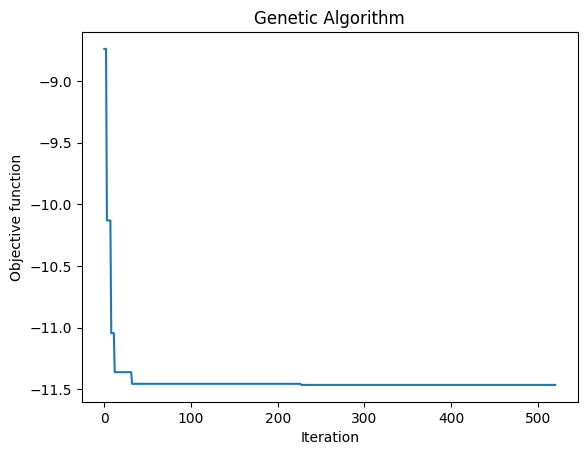

In [5]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(x):
    pen = 0
    if not -x[0] + 2*x[1]*x[0] <= 8 : pen = np.inf
    if not 2*x[0] + x[1] <= 14 : pen = np.inf
    if not 2*x[0] - x[1] <= 10 : pen = np.inf
    return -(x[0] + x[1]*x[0]) + pen
    
varbounds = np.array ([[0, 10], [0, 10]])
vartype = np.array ([['int'], ['real']])

model = ga (function = f, dimension = 2, variable_type_mixed = vartype, variable_boundaries=varbounds)
model.run()

# Genetic Algorithm: Routing Problem

In [17]:
import pandas as pd, numpy as np
from geneticalgorithm import geneticalgorithm as ga
 
#inputs
nodes = pd.read_excel("C:\\Users\\vusal.babashov\\OneDrive - Canadian Tire\\Desktop\\Pyomo\\route_inputs.xlsx", sheet_name='nodes')
paths = pd.read_excel('C:\\Users\\vusal.babashov\\OneDrive - Canadian Tire\\Desktop\\Pyomo\\route_inputs.xlsx', sheet_name='paths')
nVars = len(paths)

#fitness function
def f(x):
    pen = 0
    #constraint sum(x) == 1 (origin)
    node_origin = int(nodes.node[nodes.description=='origin'])
    if sum([x[p] for p in paths.index[paths.node_from==node_origin]]) != 1:
        pen += 1000000 * np.abs(sum([x[p] for p in paths.index[paths.node_from==node_origin]]) - 1)
        
    #constraint sum(x, in) == sum(x, out)
    for node in nodes.node[nodes.description=='middle point']:
        sum_in = sum([x[p] for p in paths.index[paths.node_to==node]])
        sum_out = sum([x[p] for p in paths.index[paths.node_from==node]])
        if sum_in != sum_out:
            pen += 1000000 * np.abs(sum_in - sum_out)
            
    #objective function and return
    objFun = sum([x[p] * paths.distance[p] for p in paths.index])
    return objFun + pen

C:\Users\vusal.babashov\AppData\Local\Temp\2\ipykernel_31572\1321379173.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  node_origin = int(nodes.node[nodes.description=='origin'])


 The best solution found:                                                                           
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 1370.0


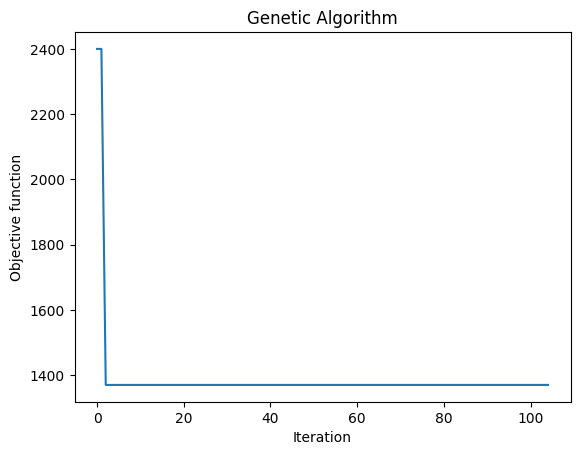



All Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
1          1        3      1500          0
2          2        4       650          1
3          2        5       900          0
4          4        7       500          1
5          5        7       400          0
6          3        6       500          0
7          6        7       400          0

Selected Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
2          2        4       650          1
4          4        7       500          1

Total path: 1370.0


In [18]:
#bounds and var type
varbounds = np.array([[0,1]]*nVars)
vartype = np.array([['int']]*nVars)
 
#GA parameters
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.30,\
                   'elit_ratio': 0.10,\
                   'crossover_probability': 0.50,\
                   'parents_portion': 0.30,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':100}
 
#Solve
model = ga(function=f,
           dimension=nVars,
           variable_type_mixed=vartype,
           variable_boundaries=varbounds,
           algorithm_parameters=algorithm_param)
model.run()
 
#print
x = model.best_variable
objFun = model.best_function
paths['activated'] = 0
for p in paths.index:
    paths.activated[p] = x[p]
 
print('\n\nAll Paths:')
print(paths)
 
print('\nSelected Paths:')
print(paths[paths.activated==1])
 
print('\nTotal path:', objFun)

In [7]:
nodes

,node,description
0,1,origin
1,2,middle point
2,3,middle point
3,4,middle point
4,5,middle point
5,6,middle point
6,7,destination


In [8]:
paths

,node_from,node_to,distance
0,1,2,220
1,1,3,1500
2,2,4,650
3,2,5,900
4,4,7,500
5,5,7,400
6,3,6,500
7,6,7,400


In [16]:
paths.index[0]

0

# Multi-Objective Problems using NSGA-II - An introduction

In [ ]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.termination import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.optimize import minimize
 
#definition of the problem
class MyProblem(ElementwiseProblem):
     
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))
 
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2
 
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
 
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
 
problem = MyProblem()
 
#parameters
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)
 
#termination criteria
termination = get_termination("n_gen", 40)
 
#solve problem
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)
 
#get solutions
X = res.X
F = res.F

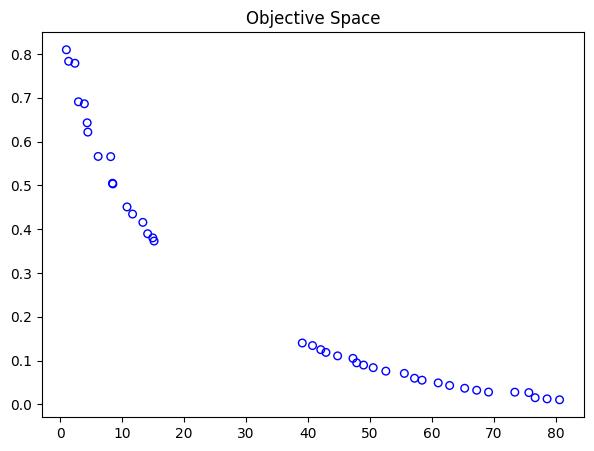

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()


# Particle Swarm Optimization

In [1]:
import numpy as np
from pyswarm import pso

def model_obj (x):
    pen = 0
    x[0] = np.round (x[0], 0)
    if not -x[0] + 2*x[1]*x[0] <= 8 : pen = np.inf
    if not 2*x[0] + x[1] <= 14 : pen = np.inf
    if not 2*x[0] - x[1] <= 10 : pen = np.inf
    return -(x[0] + x[1]*x[0]) + pen

def cons(x):
    return []

lb = [0,0]
ub = [10, 10]
x0 = [0, 0]

xopt, fopt = pso (model_obj, lb, ub, x0, cons)

print ('x=', xopt[0])
print ('y=', xopt[1])

Stopping search: Swarm best objective change less than 1e-08
x= 5.0
y= 1.2999999954647032


# Constraint Programming (CP)

In [1]:
pip show ortools

Name: ortools
Version: 9.10.4067
Summary: Google OR-Tools python libraries and modules
Home-page: https://developers.google.com/optimization/
Author: Google LLC
Author-email: or-tools@google.com
License: Apache 2.0
Location: c:\users\vusal.babashov\myprograms\python3.9\lib\site-packages
Requires: absl-py, immutabledict, numpy, pandas, protobuf
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
"""Simple solve."""
from ortools.sat.python import cp_model


def main() -> None:
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    var_upper_bound = max(50, 45, 37)
    x = model.new_int_var(0, var_upper_bound, "x")
    y = model.new_int_var(0, var_upper_bound, "y")
    z = model.new_int_var(0, var_upper_bound, "z")

    # Creates the constraints.
    model.add(2 * x + 7 * y + 3 * z <= 50)
    model.add(3 * x - 5 * y + 7 * z <= 45)
    model.add(5 * x + 2 * y - 6 * z <= 37)

    model.maximize(2 * x + 2 * y + 3 * z)

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Maximum of objective function: {solver.objective_value}\n")
        print(f"x = {solver.value(x)}")
        print(f"y = {solver.value(y)}")
        print(f"z = {solver.value(z)}")
    else:
        print("No solution found.")

    # Statistics.
    print("\nStatistics")
    print(f"  status   : {solver.status_name(status)}")
    print(f"  conflicts: {solver.num_conflicts}")
    print(f"  branches : {solver.num_branches}")
    print(f"  wall time: {solver.wall_time} s")


if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'ortools'

In [1]:
from ortools.sat.python import cp_model


def solve_with_time_limit_sample_sat():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()
    # Creates the variables.
    num_vals = 3
    x = model.new_int_var(0, num_vals - 1, "x")
    y = model.new_int_var(0, num_vals - 1, "y")
    z = model.new_int_var(0, num_vals - 1, "z")
    # Adds an all-different constraint.
    model.add(x != y)

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()

    # Sets a time limit of 10 seconds.
    solver.parameters.max_time_in_seconds = 10.0

    status = solver.solve(model)

    if status == cp_model.OPTIMAL:
        print(f"x = {solver.value(x)}")
        print(f"y = {solver.value(y)}")
        print(f"z = {solver.value(z)}")


solve_with_time_limit_sample_sat()

: 